In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [244]:
data=pd.read_csv("tips.csv")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [245]:
data.shape

(244, 7)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [247]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [248]:
from sklearn.preprocessing import LabelEncoder


In [249]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()

data["sex"] = le_sex.fit_transform(data["sex"])
data["smoker"] = le_smoker.fit_transform(data["smoker"])
data["day"] = le_day.fit_transform(data["day"])
data["time"] = le_time.fit_transform(data["time"])

In [271]:
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


<Axes: >

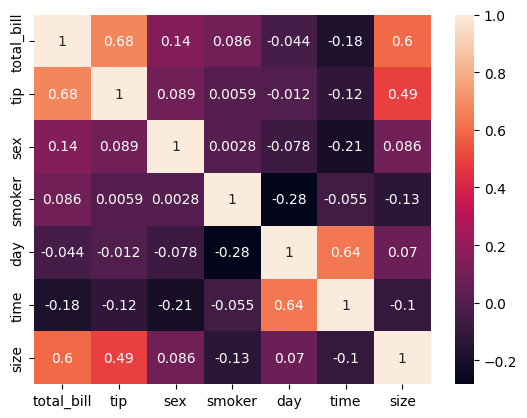

In [250]:
sns.heatmap(data.corr(),annot=True)

In [251]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [252]:
x=data.drop(["tip"],axis=1)
y=data["tip"]

In [253]:
col_drop= ["smoker","day"]
x=x.drop(col_drop,axis=1)

In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [255]:

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [256]:
x.head()

,total_bill,sex,time,size
0,16.99,0,0,2
1,10.34,1,0,3
2,21.01,1,0,3
3,23.68,1,0,2
4,24.59,0,0,4


In [257]:
result={}

In [258]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

Learning rate set to 0.031623
0:	learn: 1.4123509	total: 2.54ms	remaining: 2.54s
1:	learn: 1.3987705	total: 4.43ms	remaining: 2.21s
2:	learn: 1.3832550	total: 5.84ms	remaining: 1.94s
3:	learn: 1.3679935	total: 7.22ms	remaining: 1.8s
4:	learn: 1.3540844	total: 8.62ms	remaining: 1.72s
5:	learn: 1.3435757	total: 9.98ms	remaining: 1.65s
6:	learn: 1.3318643	total: 12ms	remaining: 1.7s
7:	learn: 1.3185485	total: 14.1ms	remaining: 1.75s
8:	learn: 1.3070349	total: 16.3ms	remaining: 1.79s
9:	learn: 1.2987597	total: 17.4ms	remaining: 1.72s
10:	learn: 1.2876980	total: 19.6ms	remaining: 1.76s
11:	learn: 1.2762257	total: 21.8ms	remaining: 1.79s
12:	learn: 1.2706215	total: 22.7ms	remaining: 1.73s
13:	learn: 1.2609495	total: 24.9ms	remaining: 1.75s
14:	learn: 1.2495037	total: 27.5ms	remaining: 1.81s
15:	learn: 1.2394232	total: 30.1ms	remaining: 1.85s
16:	learn: 1.2296833	total: 32.8ms	remaining: 1.89s
17:	learn: 1.2206533	total: 35.4ms	remaining: 1.93s
18:	learn: 1.2123772	total: 36.8ms	remaining: 1.

GaussianProcessRegressor()

In [259]:
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('GUASSIAN PROCESS',gprr2)


LINEAR REG  0.47439160273269154
RIDGE  0.47474819403011204
LASSO  -0.15896098636013822
ELASTICNET 0.24009610844714901
RANDOM FOREST  0.30800378539215656
GB 0.39868581743936404
ADABOOST 0.3206413056093641
XGB 0.07731896749925127
KNN 0.3032345091326043
SVR 0.4668755874487309
CAT 0.38172419347734976
GUASSIAN PROCESS -11990.808109741618


In [260]:
# RIDGE  0.4449495039327409
# LINEAR REG  0.4441368826121955
# SVR 0.42586650658987235
# XGB 0.40884920227805865
# KNN 0.35244765361051855

In [261]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
ridge_grid.fit(x_train_scaled, y_train)
print("Best Ridge R2:", ridge_grid.best_score_)
print("Best Params:", ridge_grid.best_params_)
ridge_y_test = ridge_grid.predict(x_test_scaled)
accuracy = r2_score(y_test,ridge_y_test)
result["Ridge"]=accuracy
print(accuracy)

Best Ridge R2: 0.33215307392396387
Best Params: {'alpha': 10, 'fit_intercept': True, 'solver': 'auto'}
0.47692634912548715


In [262]:
from sklearn.linear_model import LinearRegression

params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # only available in newer versions of sklearn
}

lr = LinearRegression()
lr_grid = GridSearchCV(lr, params, cv=5, scoring='r2')
lr_grid.fit(x_train_scaled, y_train)
print("Best Linear R2:", lr_grid.best_score_)
print("Best Params:", lr_grid.best_params_)
linear_y_test = lr_grid.predict(x_test_scaled)
accuracy = r2_score(y_test,linear_y_test)
result["Linear"]=accuracy
print(accuracy)

Best Linear R2: 0.3271227741162318
Best Params: {'fit_intercept': True, 'positive': True}
0.47439160273269154


In [263]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, params_rf, cv=5, scoring='r2')
rf_grid.fit(x_train_scaled, y_train)

print("Best RF R2:", rf_grid.best_score_)
print("Best Params:", rf_grid.best_params_)

rf_y_test = rf_grid.predict(x_test_scaled)
accuracy = r2_score(y_test,rf_y_test)
result["rf_y_test"]=accuracy
print(accuracy)



Best RF R2: 0.22713613966018417
Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.2977064242257127


In [264]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct

params_gpr = {
    'alpha': [1e-10, 1e-5, 1e-2],
    'kernel': [RBF(), DotProduct()]
}

gpr = GaussianProcessRegressor()
gpr_grid = GridSearchCV(gpr, params_gpr, cv=5, scoring='r2')
gpr_grid.fit(x_train_scaled, y_train)

print("Best GPR R2:", gpr_grid.best_score_)
print("Best Params:", gpr_grid.best_params_)

gpr_y_test = gpr_grid.predict(x_test_scaled)
print(r2_score(y_test, gpr_y_test))


Best GPR R2: 0.3261779426898445
Best Params: {'alpha': 1e-05, 'kernel': DotProduct(sigma_0=1)}
0.47439161198565616


In [265]:
from xgboost import XGBRegressor

params_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor()
xgb_grid = GridSearchCV(xgb, params_xgb, cv=5, scoring='r2')
xgb_grid.fit(x_train_scaled, y_train)

print("Best XGBoost R2:", xgb_grid.best_score_)
print("Best Params:", xgb_grid.best_params_)

xgb_y_test = xgb_grid.predict(x_test_scaled)
print(r2_score(y_test, xgb_y_test))


Best XGBoost R2: 0.2820322928340805
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
0.4589738325668197


In [266]:
from sklearn.ensemble import AdaBoostRegressor

params_adb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

adb = AdaBoostRegressor()
adb_grid = GridSearchCV(adb, params_adb, cv=5, scoring='r2')
adb_grid.fit(x_train_scaled, y_train)

print("Best AdaBoost R2:", adb_grid.best_score_)
print("Best Params:", adb_grid.best_params_)

adb_y_test = adb_grid.predict(x_test_scaled)
print(r2_score(y_test, adb_y_test))


Best AdaBoost R2: 0.3682232573938146
Best Params: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50}
0.40228752135054613


In [267]:
from sklearn.linear_model import ElasticNet

params_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 1],
    'fit_intercept': [True, False]
}

en = ElasticNet()
en_grid = GridSearchCV(en, params_elastic, cv=5, scoring='r2')
en_grid.fit(x_train_scaled, y_train)

print("Best ElasticNet R2:", en_grid.best_score_)
print("Best Params:", en_grid.best_params_)

en_y_test = en_grid.predict(x_test_scaled)
print(r2_score(y_test, en_y_test))


Best ElasticNet R2: 0.34079210695570616
Best Params: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.7}
0.5018920231856256


In [268]:
result

{'Ridge': 0.47692634912548715,
 'Linear': 0.47439160273269154,
 'rf_y_test': 0.2977064242257127}

In [270]:
joblib.dump(ridge_grid, "ridge_grid.pkl")
joblib.dump(en_grid, "elastic_grid.pkl")
joblib.dump(ss, "scaler.pkl")
joblib.dump(le_sex, "le_sex.pkl")
joblib.dump(le_smoker, "le_smoker.pkl")
joblib.dump(le_day, "le_day.pkl")
joblib.dump(le_time, "le_time.pkl")

['le_time.pkl']